In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

In [10]:
# Load data from CSV
dat = np.genfromtxt('cdf_2_rdf[#2r_#2o]_adf[C1r_C4r]-[C1o_C4o]_triples.csv', delimiter='; ',skip_header=0)
X_dat = dat[:,0]
Y_dat = dat[:,1]
Z_dat = dat[:,2]

In [12]:
# Convert from pandas dataframes to numpy arrays
X, Y, Z, = np.array([]), np.array([]), np.array([])
for i in range(len(X_dat)):
        X = np.append(X, X_dat[i])
        Y = np.append(Y, Y_dat[i])
        Z = np.append(Z, Z_dat[i])
print(Z)

[ 0.          0.          0.         ... 37.53167026 19.57824915
 39.5552615 ]


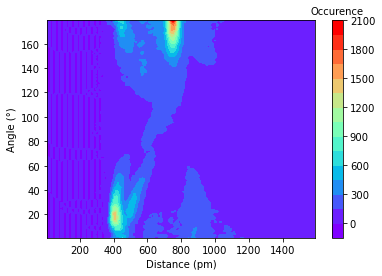

In [37]:
# create x-y points to be used in heatmap
xi = np.linspace(X.min(), X.max(), 1000)
yi = np.linspace(Y.min(), Y.max(), 1000)

# Interpolate for plotting
zi = griddata((X, Y), Z, (xi[None,:], yi[:,None]), method='cubic')

# I control the range of my colorbar by removing data 
# outside of my range of interest
zmin = -5
zmax = 2000
zi[(zi<zmin) | (zi>zmax)] = None

# Create the contour plot
CS = plt.contourf(xi, yi, zi, 15, cmap=plt.cm.rainbow,
                  vmax=zmax, vmin=zmin)
clb=plt.colorbar()
clb.ax.tick_params(labelsize=10)
clb.ax.set_title('Occurence',fontsize=10)
plt.ylabel("Angle " + "(" + chr(176) + ")")
plt.xlabel("Distance (pm)")
plt.show()